Credits/Course URL: https://www.udemy.com/course/machinelearning/

## Random Forest Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

#### Reading the data

In [2]:
data = pd.read_csv(r'E:\Github\Datasets\Position_Salaries.csv')

In [3]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = data['Level'].values.reshape(-1,1)
y = data['Salary'].values

#### Building the Random Forest Regressor

In [5]:
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=0)

In [6]:
rf_regressor.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [8]:
y_pred_train = rf_regressor.predict(X)
y_pred_train

array([ 46000.,  49000.,  59000.,  74000., 101000., 136000., 210000.,
       305000., 470000., 850000.])

#### Evaluation of the model

In [9]:
def rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

def get_prediction_metrics(y_actual_train, y_pred_train, y_actual_test = 0, y_pred_test = 0, need_test_metrics = 0):
    
    train_metrics = dict()
    test_metrics = dict()
    
    # Getting training metrics
    for metric in [mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, rmse, r2_score]:
        train_metrics[metric.__name__+'_(train)'] = round(metric(y_actual_train, y_pred_train),2)
    
    # Getting test metrics
    if need_test_metrics:
        for metric in [mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, rmse, r2_score]:
            test_metrics[metric.__name__+'_(test)'] = round(metric(y_actual_test, y_pred_test),2)
    
    # Printing the values
    for metric in [mean_absolute_error, mean_squared_error, rmse, mean_absolute_percentage_error, r2_score]:
        print(f"\n{metric.__name__+'_(train)'}: {train_metrics[metric.__name__+'_(train)']}")
        if need_test_metrics:
            print(f"{metric.__name__+'_(test)'}: {test_metrics[metric.__name__+'_(test)']}")
    
    return train_metrics, test_metrics

In [10]:
pred_metrics = get_prediction_metrics(y_actual_train = y, 
                                      y_pred_train = y_pred_train)


mean_absolute_error_(train): 22700.0

mean_squared_error_(train): 2384100000.0

rmse_(train): 48827.25

mean_absolute_percentage_error_(train): 0.06

r2_score_(train): 0.97


#### Getting predictions based on user input

In [11]:
def get_predictions_random_forest_model(user_input):
    try:
        user_input = float(user_input)
    except:
        return "Invalid input! Please try again with integer as input."
    
    user_input = np.array(user_input).reshape(-1,1)
    prediction = rf_regressor.predict(user_input)
    return prediction

In [12]:
user_input = input('Enter the position level (as integer): ')
get_predictions_random_forest_model(user_input)

Enter the position level (as integer): 6.5


array([167000.])

In [14]:
X_grid = np.arange(min(X), max(X), 0.1).reshape(-1,1)

y_pred_Xgrid = rf_regressor.predict(X_grid)

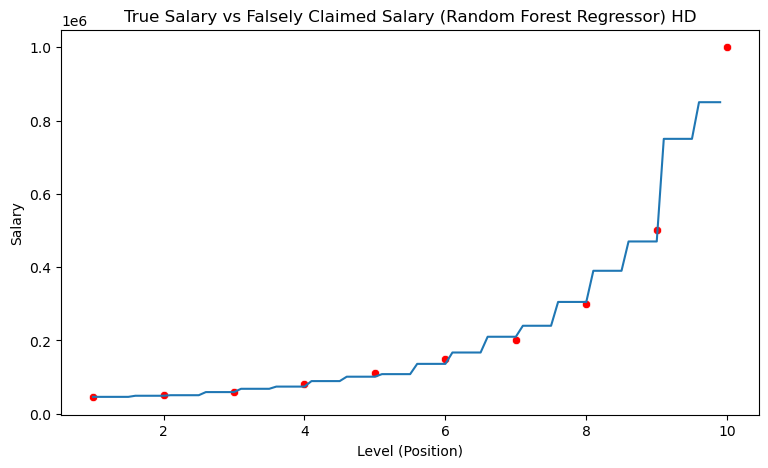

In [15]:
plt.figure(figsize=(9,5))
sns.scatterplot(x = X.ravel(), y = y, color = 'red')
sns.lineplot(x = X_grid.ravel(), y = y_pred_Xgrid)
plt.title("True Salary vs Falsely Claimed Salary (Random Forest Regressor) HD")
plt.xlabel("Level (Position)")
plt.ylabel("Salary");